This is my first project
the goal for this project is,


*   Manipulating data
*   visualization
*   Data Cleansing
*   EDA (exploratory Data Analysis)

Superstore Sales Analysis

This script performs exploratory data analysis (EDA) on a sample supermarket dataset.
It includes data loading, cleaning, visualization, and insights extraction.

Author: Muhamad Ardika



# 1. Preparation

In [1]:
# 📦 Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load Dataset
url = 'https://raw.githubusercontent.com/Ardi1623/superstore/refs/heads/main/SampleSuperstore.csv'
df = pd.read_csv(url)

Showing first 10 data

In [2]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# 2. Identifying Data Structures

In [3]:
# General Information CHecking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# Check Unique Columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
# Descriptive statistics
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# 3. Data Cleansing

In [6]:
# Null Check
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [7]:
# Duplicate data Check
print(f"Duplikat: {df.duplicated().sum()}")

Duplikat: 17


In [8]:
# Remove duplicates if any.
df = df.drop_duplicates()

# 4. Descriptive Analysis


*   What category dominates sales? Which category brings in the most revenue overall?
*   Which sub-categories are often discounted? Which specific product types within the broader categories frequently have price reductions applied?
*   Which region is the most profitable? Which geographical area generates the highest profit margins?





In [15]:
# Total sales per product category.
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(sales_by_category)

Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64


In [16]:
# Average discount per sub-category.
avg_discount = df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)
print(avg_discount)

Sub-Category
Binders        0.372011
Machines       0.306087
Tables         0.261285
Bookcases      0.211140
Chairs         0.170244
Appliances     0.166524
Copiers        0.161765
Phones         0.154556
Furnishings    0.138494
Fasteners      0.082028
Envelopes      0.080315
Accessories    0.078452
Supplies       0.076842
Art            0.074969
Paper          0.074908
Storage        0.074704
Labels         0.068871
Name: Discount, dtype: float64


In [17]:
# Rata-rata profit per region
avg_profit = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)
print(avg_profit)

Region
West       33.927281
East       32.163905
South      28.857673
Central    17.100421
Name: Profit, dtype: float64


# 5. Insight + Data Visualization

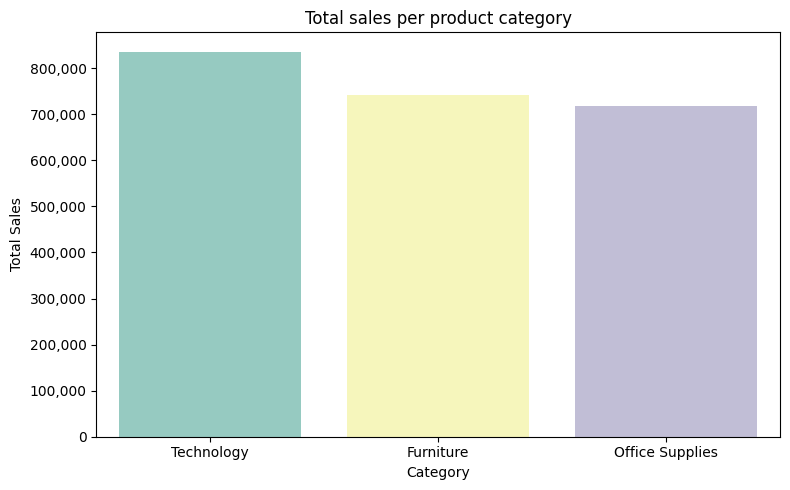

In [29]:
# Total sales per product category.
import matplotlib.ticker as mtick

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, hue=sales_by_category.index, dodge=False, palette='Set3', legend=False)
plt.title('Total sales per product category')
plt.ylabel('Total Sales')
plt.xlabel('Category')

# add separator to Y axis
ax = plt.gca()
# The format f'{int(x):,}' will automatically change 100000 to 100,000 — making the final result neater and easier to read.
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

*📦 Product Category with the Highest Sales From the Total Sales per Category chart, it's evident that Technology contributes the highest sales, followed by Furniture.*

*💡 Recommendation: Focus promotions and special offers on Technology products, as the market indicates high demand.*

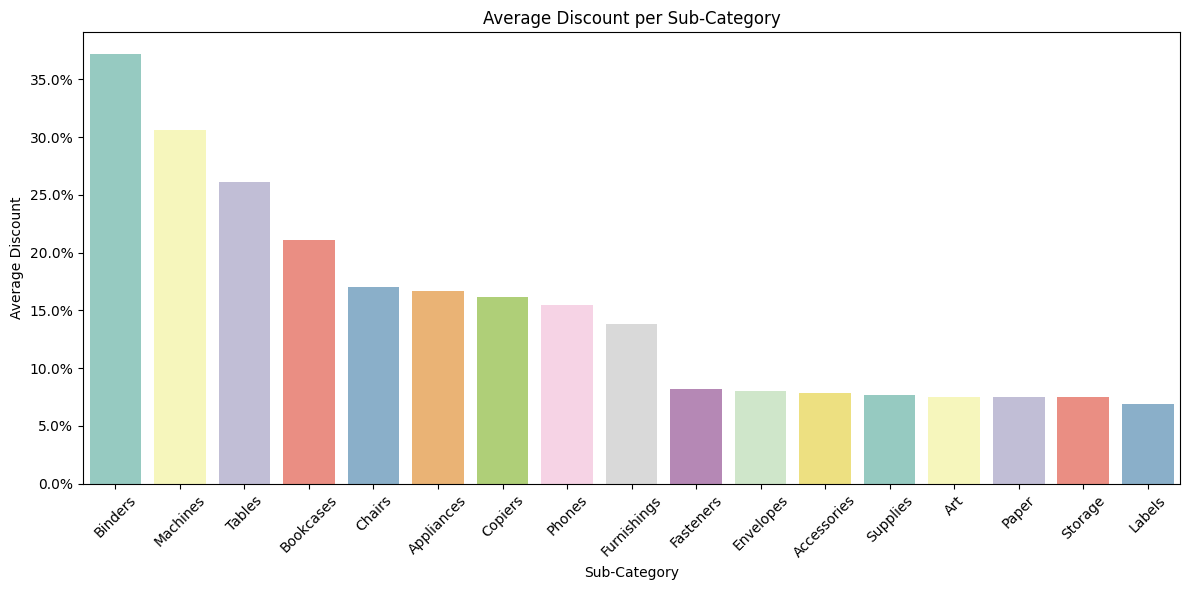

In [30]:
# Average Discount per Sub-Category.

plt.figure(figsize=(12,6))
sns.barplot(x=avg_discount.index, y=avg_discount.values, hue=avg_discount.index, dodge=False, palette='Set3', legend=False)
plt.title('Average Discount per Sub-Category')
plt.ylabel('Average Discount')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)

# Format persentase (jika ingin tampilkan 0.2 jadi 20%)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # 1.0 artinya 100%

plt.tight_layout()
plt.show()


*🎯 Sub-Categories with High Discounts
From the Average Discount per Sub-Category chart, several sub-categories like Binders and Machine have high discounts.*

*💡 Recommendation: Evaluate the discount strategy — are these discounts genuinely increasing profit, or are they simply eroding margins?*

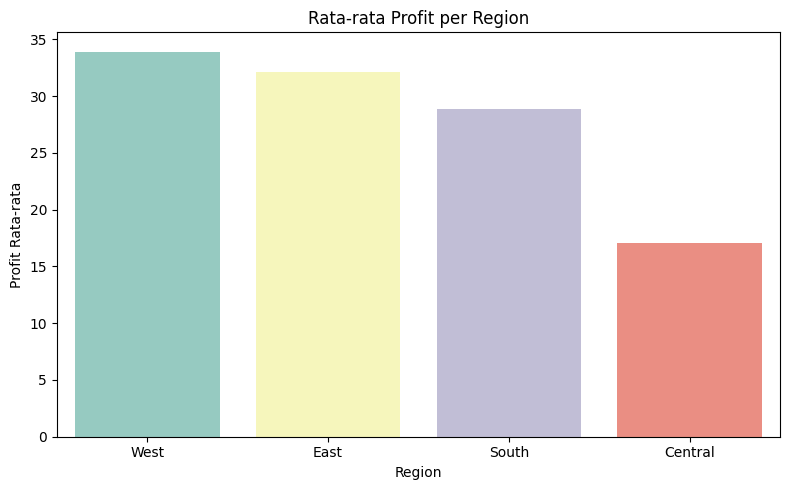

In [31]:
# Average Profit per Region.

plt.figure(figsize=(8,5))
sns.barplot(x=avg_profit.index, y=avg_profit.values, hue=avg_profit.index, dodge=False, palette='Set3', legend=False)
plt.title('Rata-rata Profit per Region')
plt.ylabel('Profit Rata-rata')
plt.xlabel('Region')

# Separator ribuan
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()


*From the Average Profit per Region chart, for example, the West generates the highest profit.*

*💡 Recommendation: Increase investment in logistics and marketing in this region to expand market share.*

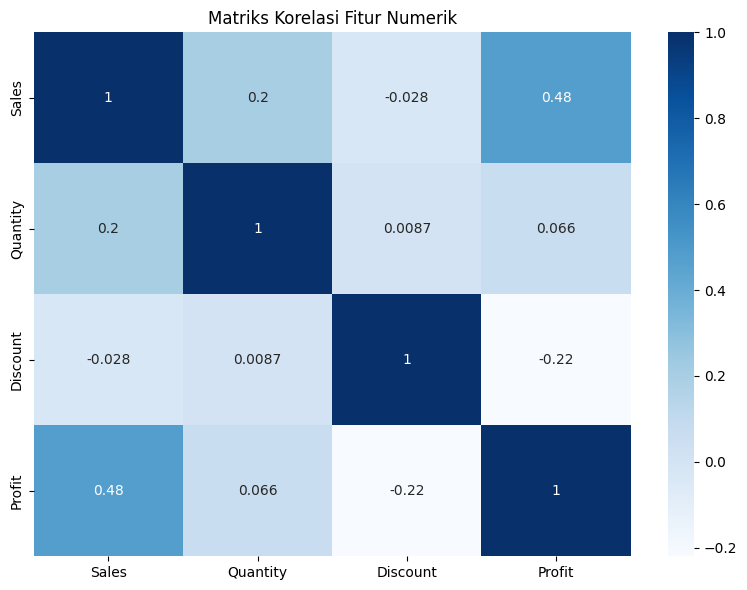

In [33]:
# Correlation Matrix

plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='Blues')
plt.title('Matriks Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()


From the Correlation Heatmap, you might see:

*Discount has a negative correlation with Profit.
Sales and Profit do not have a very strong correlation.*
*💡 Recommendation: Potential pricing issues. Further analysis is needed to determine whether large discounts truly drive profitability or are actually detrimental.*

# 6. Additional Insight for Technology catgory

In [34]:
# Only Technology Category dataframe
tech_df = df[df['Category'] == 'Technology']


## Technology Sub-Category with the Highest Profit per Region.

In [38]:
# Group by Region dan Sub-Category, Calc total profit
profit_by_region_sub = tech_df.groupby(['Region', 'Sub-Category'])['Profit'].sum().reset_index()

# To see the top most profitable sub-category per region.
top_profit_per_region = profit_by_region_sub.sort_values('Profit', ascending=False).groupby('Region').first().reset_index()
top_profit_per_region


,Region,Sub-Category,Profit
0,Central,Copiers,15608.8413
1,East,Copiers,17022.8418
2,South,Phones,10767.2753
3,West,Copiers,19327.2351


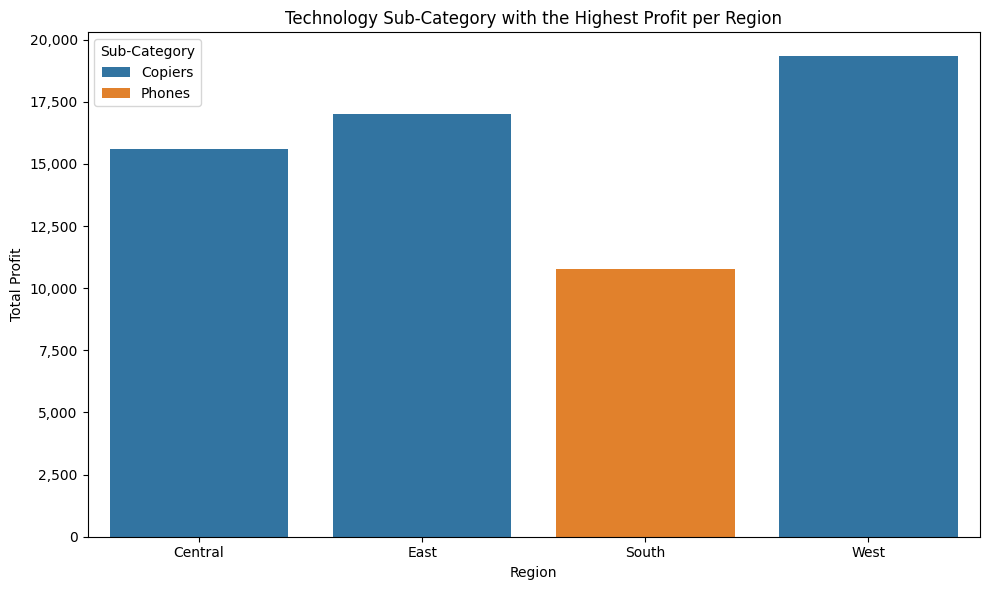

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_profit_per_region, x='Region', y='Profit', hue='Sub-Category')
plt.title('Technology Sub-Category with the Highest Profit per Region')
plt.ylabel('Total Profit')
plt.xlabel('Region')

# Thousand format
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.tight_layout()
plt.show()

We can see that specific products are more profitable in certain regions, for example:

*Phones are most profitable in the West.*
*Copiers might dominate in the East.*
*💡 Recommendation: Adjust inventory and marketing strategies for each region based on the most profitable sub-categories.*

## Technology Sub-Category with the Highest Discount in Each Region.

In [42]:
# Average Discount per sub-category for each region
discount_by_region_sub = tech_df.groupby(['Region', 'Sub-Category'])['Discount'].mean().reset_index()

# Get the sub-category with the highest discount per region.
top_discount_per_region = discount_by_region_sub.sort_values('Discount', ascending=False).groupby('Region').first().reset_index()
top_discount_per_region

,Region,Sub-Category,Discount
0,Central,Machines,0.328571
1,East,Machines,0.283784
2,South,Machines,0.333333
3,West,Machines,0.302564


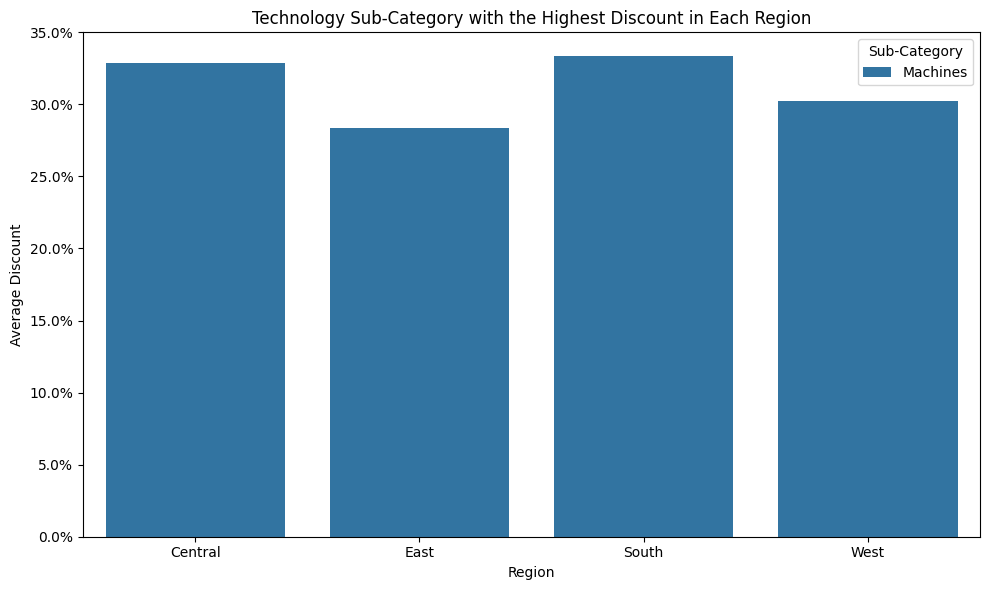

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_discount_per_region, x='Region', y='Discount', hue='Sub-Category')
plt.title('Technology Sub-Category with the Highest Discount in Each Region')
plt.ylabel('Average Discount')
plt.xlabel('Region')

# Format persentase
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()


*Large discounts do not necessarily mean high sales — this needs to be compared with the profit above.*

*If the most heavily discounted sub-categories are not profitable, then the promotion strategy needs to be evaluated.*

## Correlation Between Features in Each Region (Technology).

In [44]:
# Dictionary for each region
corr_per_region = {}

for region in tech_df['Region'].unique():
    corr = tech_df[tech_df['Region'] == region][['Sales', 'Quantity', 'Discount', 'Profit']].corr()
    corr_per_region[region] = corr.round(2)

# showing correlation each region
corr_per_region


{'West':           Sales  Quantity  Discount  Profit
 Sales      1.00      0.21      0.05    0.73
 Quantity   0.21      1.00     -0.00    0.07
 Discount   0.05     -0.00      1.00   -0.22
 Profit     0.73      0.07     -0.22    1.00,
 'Central':           Sales  Quantity  Discount  Profit
 Sales      1.00      0.21      0.03    0.79
 Quantity   0.21      1.00     -0.02    0.08
 Discount   0.03     -0.02      1.00   -0.16
 Profit     0.79      0.08     -0.16    1.00,
 'East':           Sales  Quantity  Discount  Profit
 Sales      1.00      0.23     -0.03    0.60
 Quantity   0.23      1.00      0.02    0.10
 Discount  -0.03      0.02      1.00   -0.31
 Profit     0.60      0.10     -0.31    1.00,
 'South':           Sales  Quantity  Discount  Profit
 Sales      1.00      0.21      0.19   -0.16
 Quantity   0.21      1.00     -0.11    0.16
 Discount   0.19     -0.11      1.00   -0.38
 Profit    -0.16      0.16     -0.38    1.00}

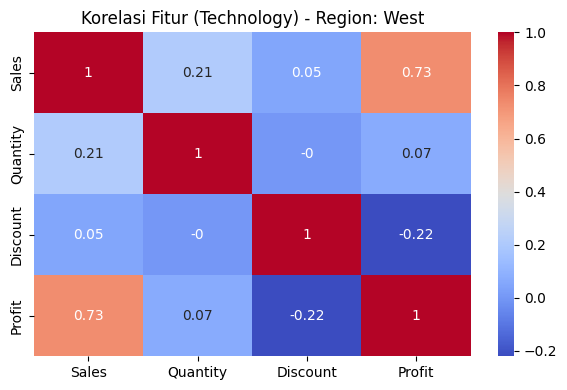

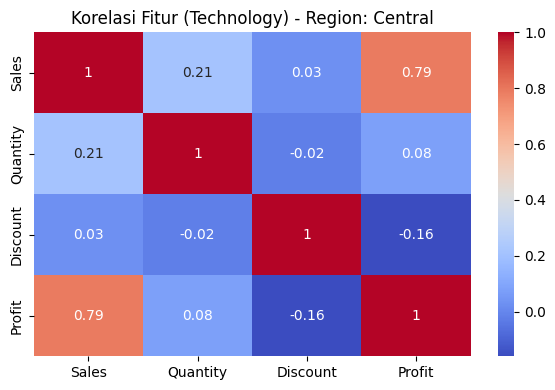

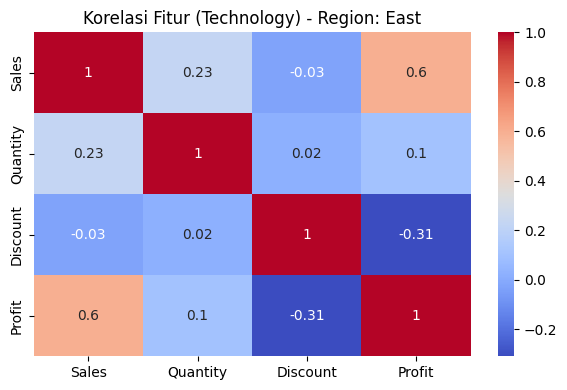

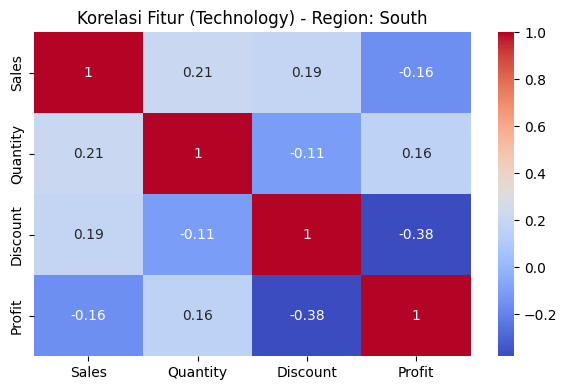

In [45]:
for region, corr in corr_per_region.items():
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Technology - Region: {region}')
    plt.tight_layout()
    plt.show()


*If Discount is negative towards Profit in all regions → discounts are detrimental.*
*If Sales and Profit do not have a strong correlation → there might be hidden costs or large discounts eroding margins.*
*A strong correlation between Quantity and Sales is normal, but Quantity and Profit is not always positive.*

# 7. Additional insight for discount

## Identify Detrimental Discounts.

In [46]:
# Grouping Region, Category, Sub-Category
grouped = df.groupby(['Region', 'Category', 'Sub-Category'])[['Discount', 'Profit']].mean().reset_index()

# Add column: loss or profit.
grouped['Status'] = grouped['Profit'].apply(lambda x: 'Loss' if x < 0 else 'Profit')

grouped_sorted = grouped.sort_values('Profit')  # Biar yang rugi muncul dulu
grouped_sorted.head(10)


,Region,Category,Sub-Category,Discount,Profit,Status
20,East,Furniture,Tables,0.373750,-137.817251,Loss
37,South,Furniture,Tables,0.222549,-90.648194,Loss
49,South,Technology,Machines,0.333333,-79.938500,Loss
15,Central,Technology,Machines,0.328571,-70.765076,Loss
3,Central,Furniture,Tables,0.262500,-49.439589,Loss
0,Central,Furniture,Bookcases,0.232800,-39.958086,Loss
4,Central,Office Supplies,Appliances,0.448780,-21.452175,Loss
29,East,Office Supplies,Supplies,0.067857,-20.627414,Loss
51,West,Furniture,Bookcases,0.228750,-20.581396,Loss
2,Central,Furniture,Furnishings,0.403902,-19.054716,Loss


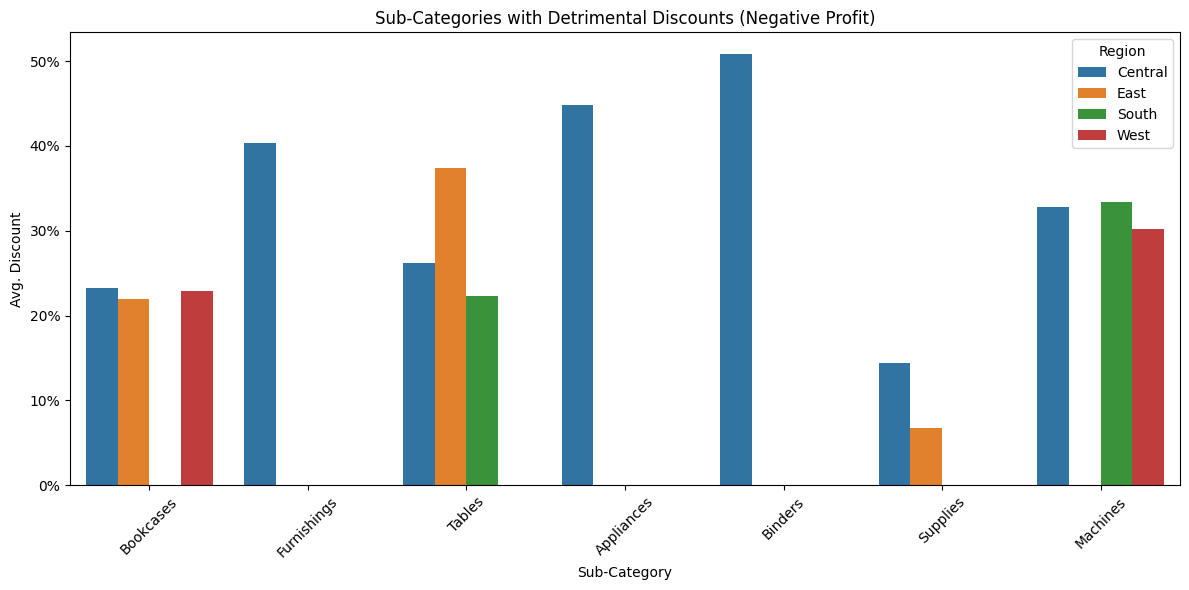

In [47]:
# only loss
rugi_df = grouped[grouped['Status'] == 'Loss']

plt.figure(figsize=(12,6))
sns.barplot(data=rugi_df, x='Sub-Category', y='Discount', hue='Region')
plt.title('Sub-Categories with Detrimental Discounts (Negative Profit)')
plt.ylabel('Avg. Discount')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)

# percentage format
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()


Sub-categories like Tables, Machines, or Bookcases (for example) might appear as highly discounted but unprofitable in certain regions.
💡 Business Recommendations:

* Re-evaluate the discount strategies for these sub-categories.
* Consider bundling, upselling, or alternative promotions that don't directly reduce margins.
* Also check operational/logistics costs in those regions (these could be the cause of low profit).

# 8. Summary